# Analyse du corpus B (Le Vingtième Siècle 1890-1940)

Le corpus B correspond au fichier "txt2"

### Imports

In [1]:
import os
import textract

In [2]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/laure-
[nltk_data]     annemassart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Vérifications diverses

In [4]:
txt1_path = '../data/txt2'

txts = []
for f in os.listdir(txt1_path):
    if os.path.isfile(os.path.join(txt1_path, f)):
        txts.append(f)
txts[:10]

['KB_JB729_1933-04-21_01-00008.txt',
 'KB_JB729_1913-04-23_01-00004.txt',
 'KB_JB729_1903-09-02_01-00003.txt',
 'KB_JB729_1933-04-26_01-00008.txt',
 'KB_JB729_1911-11-19_01-00002.txt',
 'KB_JB729_1908-05-01_01-00002.txt',
 'KB_JB729_1925-11-05_01-00002.txt',
 'KB_JB729_1938-11-03_01-00004.txt',
 'KB_JB729_1923-04-15_01-00004.txt',
 'KB_JB729_1925-05-01_01-00001.txt']

In [5]:
path = "../data/txt2/"
files = sorted(os.listdir(path))
len(files)

501

### Visualiser le nombre de documents par mois

In [6]:
all_years = [str(year) for year in range(1887, 1971)]

In [7]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

count_decade

Anomalous file: .DS_Store


defaultdict(int,
            {'1890s': 44, '1900s': 75, '1910s': 88, '1920s': 214, '1930s': 79})

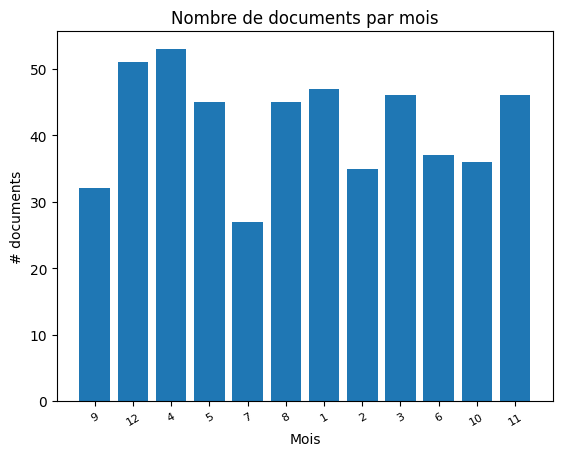

In [8]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

### Fréquence des mots du corpus

In [9]:
!cat ../data/txt2/*.txt > ../data/txt2_all.txt

In [28]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "bruxelles", "ministre", "rue", "pays", "centimes", 
       "sables", "vente", "heures", "grand", "leurs", "jour", "peu", "quelques", "toute",
       "ans", "elles", "temps", "belgique", "saint", "vie", "grande", "point", "quand"]
sw = set(sw)

In [29]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

220 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'ans', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'belgique', 'bien', 'bruxelles', 'c', 'ce', 'cela', 'celle', 'centimes', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'elles', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'grand', 'grande', 'het', 'heures', 'il', 'ils', 'j', 'je', 'jour', 'jusqu', 'l', 'la', 'le', 'les', 'leu

In [30]:
path = "../data/txt2_all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [31]:
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

3813847 words found


In [32]:
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1358984 words kept (177745 different word forms)


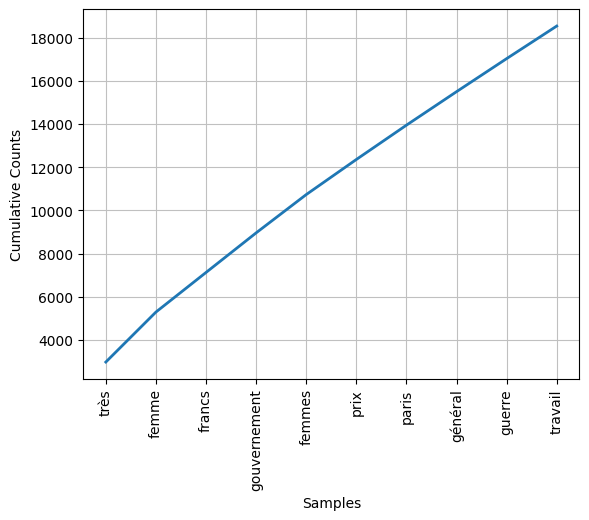

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [33]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

n = 10
fdist.plot(n, cumulative=True)